In [1]:
import torch
import torch.nn as nn
import torch.optim as optim  # obtenemos calculo de errores
from torchvision import utils
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Construyendo un modelo

In [3]:
data_path = 'data/'
mean = (0.4915, 0.4823, 0.4468)
std = (0.2470, 0.2435, 0.2616)
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)
                                ]))
full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                                      transform=transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean, std)
                                      ]))

Files already downloaded and verified
Files already downloaded and verified


In [5]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

In [6]:
len(full_validation_set)

10000

In [7]:
len(full_data_set)

50000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse
dog
ship
deer


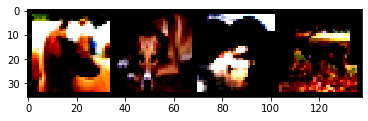

In [8]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()
classes = ['planes', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))
for i in range(size):
    print(classes[labels[i]])

In [10]:
class_names = ['car', 'cat']
label_map = {1: 0, 3: 1}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [11]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [12]:
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

In [13]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [14]:
x = torch.tensor([1.0, 2.0, 3.0])

In [15]:
soft = softmax(x)
soft, soft.sum()

(tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

In [25]:
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

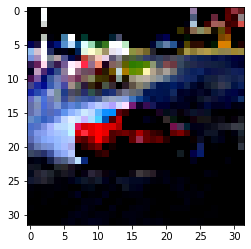

In [26]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [27]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4467, 0.5533]], grad_fn=<SoftmaxBackward>)

In [28]:
_, index = torch.max(out, dim=1)

In [29]:
print('->', class_names[label], ' model:', class_names[index])

-> car  model: cat
